In [1]:
import scanpy as sc
import os
import anndata as ad
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, norm
 

sc.settings.verbosity=0 # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.n_jobs=4
sc.settings.set_figure_params(dpi_save=300, facecolor="white", frameon=False, figsize=(14,14))
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

%matplotlib inline




# Load v2

In [2]:
sc.settings.figdir = "supp_fig1"

In [32]:
adata=sc.read_h5ad('/nfs/team298/ls34//fibroblast_atlas/fig1/model_NEWDATA/adata_clustered_prurigo.h5ad.v2.mindist4.allgenes')
adata
#adata_lesional.obs["lvl3_annotation_pred"].value_counts())

AnnData object with n_obs × n_vars = 6361 × 36601
    obs: 'sample_id', 'barcode', 'Patient_status', 'DonorID', 'n_genes', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'QC_hi', 'QC_mid', 'Site_status_binary', 'leiden_res1', 'leiden_res0.5', 'test12', 'Mapping', 'cell_type_pred'
    uns: 'cell_type_pred_colors', 'leiden_res0.5', 'leiden_res1', 'neighbor_20', 'test12_colors', 'umap'
    obsm: 'X_scpoli', 'X_scvi', 'X_umap'
    layers: 'counts'
    obsp: 'neighbor_20_connectivities', 'neighbor_20_distances'

In [18]:
# # neighbor_id a= "neighbor_30"   
# # neighbor=30
# sc.pp.neighbors(adata_subset, use_rep = 'X_scvi', metric = "euclidean", n_neighbors=neighbor,key_added=neighbor_id)
# print("neighbours done")

# sc.tl.umap(full_latent, min_dist=MIN_DIST) #neighbors_key =neighbor_id) 
# print(f"UMAP done. Min dist {mindist}")


/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


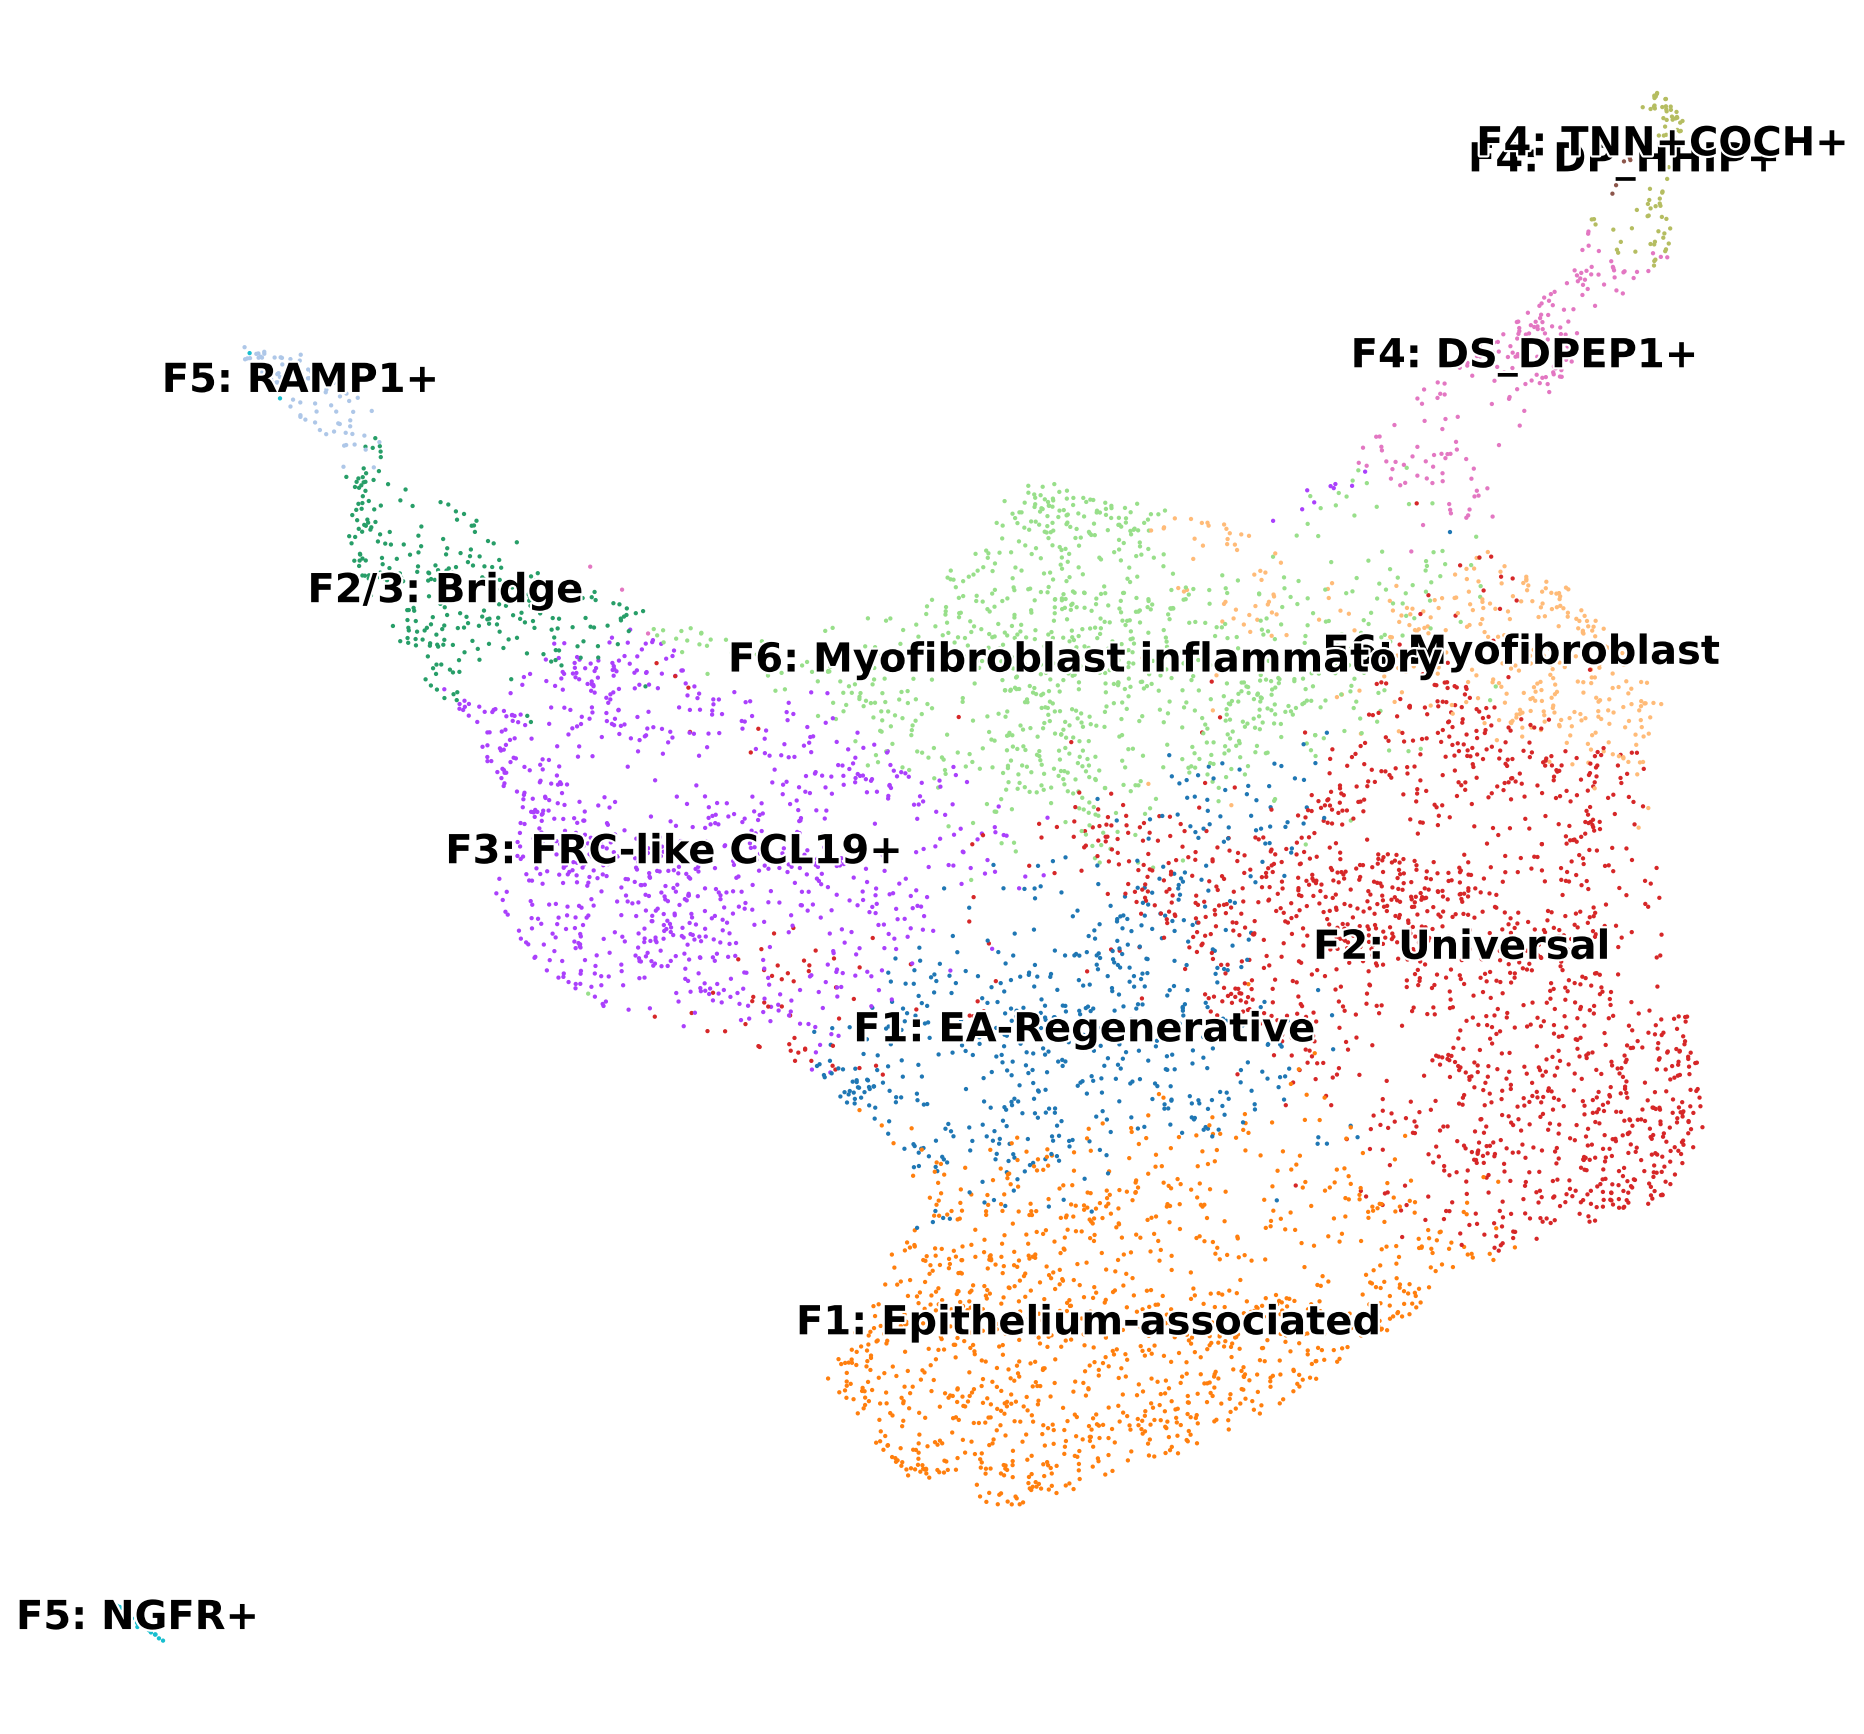

In [20]:
sc.pl.umap(
    adata,
    color='cell_type_pred',
    show=True,
    frameon=False,
    legend_loc="on data",
    legend_fontsize=18,
    s=15,
    title='',
    legend_fontoutline=2,
)

In [21]:
import pickle

pickle_file_path = '/nfs/team298/ls34/fb_dict.pkl'

with open(pickle_file_path, 'rb') as file:
    reynolds_short_final = pickle.load(file)





In [36]:
LESIONAL_GENES_VSHORT5 = {   
    "F3": ['CCL19',
 'CD74',
 'CH25H',
#  'TNFSF13B',
# 'HLA-DRA',
                                      "ADAMDEC1", "CXCL9"
          ], 
                          "F1": [#'APCDD1',
 'COL18A1',
 'COL23A1',
 'COL13A1',
 'NKD2',
 #'RSPO1',
 #'WIF1', 'CYP26B1', 
                              'CRABP1', # "IGFBP2", 
                                            'TNFRSF21', 'CXCL1', #'IL32',  'IL1R1',  'ITGA1', #
                                         #  'PDE4B',#"CCL8", #'FZD10', 
                                         #  'GUCY1A1',
                                          # "GGT5"
                                          ],
                         # "F1 Regenerative downregulated": ["WIF1"],
                        "F1+F6": ["WNT5A", "COL7A1"],
    "F6":    [ "CXCL8", 'CXCL5', "CXCL6",  "CXCL13",    'IL11', "IL24","MMP1", "MMP3",
                                      "IL7R",
                                     "INHBA",     "CSF3",  "TDO2", 
                                                      #  "IL7R",  #"CDH6", 
                            #"TENM4","H19", #"TSPAN13","LAMP5" 
                          #"TOX", "NEFH", "FABP5", "LRRC17", "ADAM12", "PLPP4", "FAT3",  #   "SLC24A2", "COL10A1",#  "LAMP5",  
                                     # "EGFL6", #"ALPK2",
                                              #"ITGA10", "ADAMTS14", 
                                           #'STARD4-AS1', #'COL9A3', # "ADAM19", "SIX1", "TNFSF4", 
                                              # "MIR503HG",
      # "POPDC3", #"MSX2", "GK", "CPM", 
                                      "WWC1", #"SLAMF8", 
      # "BMP8A", 
       "CHI3L1",#"STAT4",#"IFI30",
                                          "CCL5", # "CCL3",    
                                          "CCL11",   #"HCK", #"FOXQ1", "FOXF2", 
       "FAM167A", 
                                          "HIF1A"
#        "CCL19", "CD74", "RBP5",# "HLA-DRA",
                                    ],
                          #
#                           ["PTGDR", "CSF3",   "TDO2", "POPDC3", "MSX2",# "GK", "CPM", "WWC1", "SLAMF8", 
#        "BMP8A", "CHI3L1","STAT4",  #"HCK", #"FOXQ1", "FOXF2", 
       
#        "CCL19", "CD74", "RBP5", "HLA-DRA", "IFI30","CCL5", ],
                          
#                           "MYOFB2": ["PTGDR", "CSF3",   "TDO2", "POPDC3", "MSX2",# "GK", "CPM", "WWC1", "SLAMF8", 
#        "BMP8A", "CHI3L1","STAT4",  #"HCK", #"FOXQ1", "FOXF2", 
       
#        "CCL19", "CD74", "RBP5", "HLA-DRA", "IFI30","CCL5", ],

         "F6+F7": [  "WNT2", # "WNT4" 
                     "COL10A1", "LAMP5"], #"ZNF469", # "ITGA4",# "TDO2",             
                  
                                 #     "F_Fascia1": ["MYOC", "CCDC3", "COLGALT2", "TMOD1", "GLIPR1"],
                   # "F_Fascia2": ["CDH13", "CRTAC1", "ITGA10"],
                  
                            #"PP": ["LRP1B", "CAPS", "F5", "FGFBP2", "TBX5", "HOXA13", "SOSTDC1"],
               "F7": [ 'NRG1', "OGN"],
                          "F6-F8": [ "ACTA2", "TAGLN","ASPN", 'COMP', "COL11A1",
    
                                          
                                          # "MYH9" 
                         "KIF26B",  "ZNF469", # "GUCY1A2",  
                            "RUNX2",#  "ADAMTS14",
                                      "SULF1",
                                  "ADAM12", "ADAM19",  "COL8A1", "LRRC15", "CREB3L1","CTHRC1", "CCN4", "FABP5",     "CDH2"],
                              
                          
                "F7+F8": ["C1QTNF3", "CADM1",      "LRRC17",   # "SCX" ,
                                   "PIEZO2" ,  "SFRP4",  "KCNMA1", ],#"FAT3",
                       
#                           "F8": ["ACAN", # "TUBB2B", 
#                                 # 'CD70' ,
#                             #     "MEST", #"DRAXIN"
#                               # "DPP4",
#                          "SCX",    "THBS4", "ITGA10", #"EVI2A" ,
#                              "FGF18",   'PRG4',  'CRTAC1', 
#                                     # "IL13RA1","IL13RA2",
                          
#                                      # "PRG4",
#                   #        "CCN3", #"CCN5",#"PROCR",# "IL4R",
#                                        # "ALDH1A1",# "CRTAC1", 
#                            #"GALNT15",
#                                       # "MYOC", 
#         # "CILP2", 
#    # "CHAD", "PDLIM3", 
#                          ]
    
#     [ "ITGA10", "CCN3",  #"DPP4",
#                              "THBS4",  #"GALNT15",
#                                       # "MYOC",# "SCX", 
#                                    #   "NCAM1","CHAD", #"IL13RA1","IL13RA2",
#                             # "CILP2", #"PROCR",# "CHAD",
#                                       "PRG4", "CRTAC1", #"FGF18", 
#                                        "EVI2A" #"CCN5"# "FGF18", "IL4R"
#                                       ], 
                 }
 



In [16]:
# import pickle

# # Define your file path
# file_path = '/nfs/team298/ls34/fb_dict_lesional.pkl'

# # Save the dictionary
# with open(file_path, 'wb') as file:
#     pickle.dump(LESIONAL_GENES_VSHORT5, file)

# print(f"Dictionary saved to {file_path}")





Dictionary saved to /nfs/team298/ls34/fb_dict_lesional.pkl


# include F3 in plot

In [17]:
# adata_lesional3=adata_lesional[(adata_lesional.obs["test13"].str.startswith("F3"))|
#                             (adata_lesional.obs["test13"].str.startswith("F1"))|
#                             (adata_lesional.obs["test13"].str.startswith("F6"))|
#                               (adata_lesional.obs["test13"].str.startswith("F7"))|
#                                   (adata_lesional.obs["test13"].str.startswith("F8"))|
#                               (adata_lesional.obs["test13"].str.startswith("F_"))
#                              ]




# desired_order = ['F3: FRC-like',
#     'F1: Superficial',
#     'F6: Inflammatory myofibroblast',
#     'F7: Myofibroblast',
#     'F8: Fascia-like myofibroblast',
#     'F_Fascia'
# ]

# adata_lesional3.obs['test13'] = pd.Categorical(
#     adata_lesional3.obs['test13'],
#     categories=desired_order,
#     ordered=True
# )



/tmp/ipykernel_14058/3479157417.py:20: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_lesional3.obs['test13'] = pd.Categorical(


In [18]:
adata_lesional3.obs["test13"].value_counts()

test13
F8: Fascia-like myofibroblast     38290
F1: Superficial                   36949
F7: Myofibroblast                 25474
F3: FRC-like                      23147
F6: Inflammatory myofibroblast     6157
F_Fascia                           1764
Name: count, dtype: int64

In [23]:
{x:x for x in adata.obs["cell_type_pred"].unique()}

{'F6: Myofibroblast inflammatory': 'F6: Myofibroblast inflammatory',
 'F4: DS_DPEP1+': 'F4: DS_DPEP1+',
 'F1: EA-Regenerative': 'F1: EA-Regenerative',
 'F1: Epithelium-associated': 'F1: Epithelium-associated',
 'F3: FRC-like CCL19+': 'F3: FRC-like CCL19+',
 'F2: Universal': 'F2: Universal',
 'F6: Myofibroblast': 'F6: Myofibroblast',
 'F2/3: Bridge': 'F2/3: Bridge',
 'F5: RAMP1+': 'F5: RAMP1+',
 'F5: NGFR+': 'F5: NGFR+',
 'F4: TNN+COCH+': 'F4: TNN+COCH+',
 'F4: DP_HHIP+': 'F4: DP_HHIP+'}

In [33]:
RENAME = {'F6: Myofibroblast inflammatory': 'F6: Inflammatory myofibroblast',
 'F4: DS_DPEP1+': 'F4: DS_DPEP1+',
 'F1: EA-Regenerative': 'F1: Superficial',
 'F1: Epithelium-associated': 'F1: Superficial',
 'F3: FRC-like CCL19+': 'F3: FRC-like',
 'F2: Universal': 'F2: Universal',
 'F6: Myofibroblast': 'F7: Myofibroblast',
 'F2/3: Bridge': 'F2/3: Perivascular',
 'F5: RAMP1+': 'F5: RAMP1+',
 'F5: NGFR+': 'F5: NGFR+',
 'F4: TNN+COCH+': 'F4: TNN+COCH+',
 'F4: DP_HHIP+': 'F4: DP_HHIP+'}

adata.obs["cell_type_pred"] = adata.obs["cell_type_pred"].map(RENAME)

In [26]:
list(adata.obs["cell_type_pred"].unique())

['F6: Inflammatory myofibroblast',
 'F4: DS_DPEP1+',
 'F1: Superficial',
 'F3: FRC-like',
 'F2: Universal',
 'F8: Myofibroblast',
 'F2/3: Perivascular',
 'F5: RAMP1+',
 'F5: NGFR+',
 'F4: TNN+COCH+',
 'F4: DP_HHIP+']

In [34]:
NEW_ORDER = [

 'F1: Superficial', 

 'F2: Universal','F2/3: Perivascular',
 'F3: FRC-like',

 'F4: DS_DPEP1+',
 'F4: TNN+COCH+',
 'F4: DP_HHIP+',
           'F5: RAMP1+',
 'F5: NGFR+',  
            'F6: Inflammatory myofibroblast',
     'F7: Myofibroblast',
    
            ]

/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(

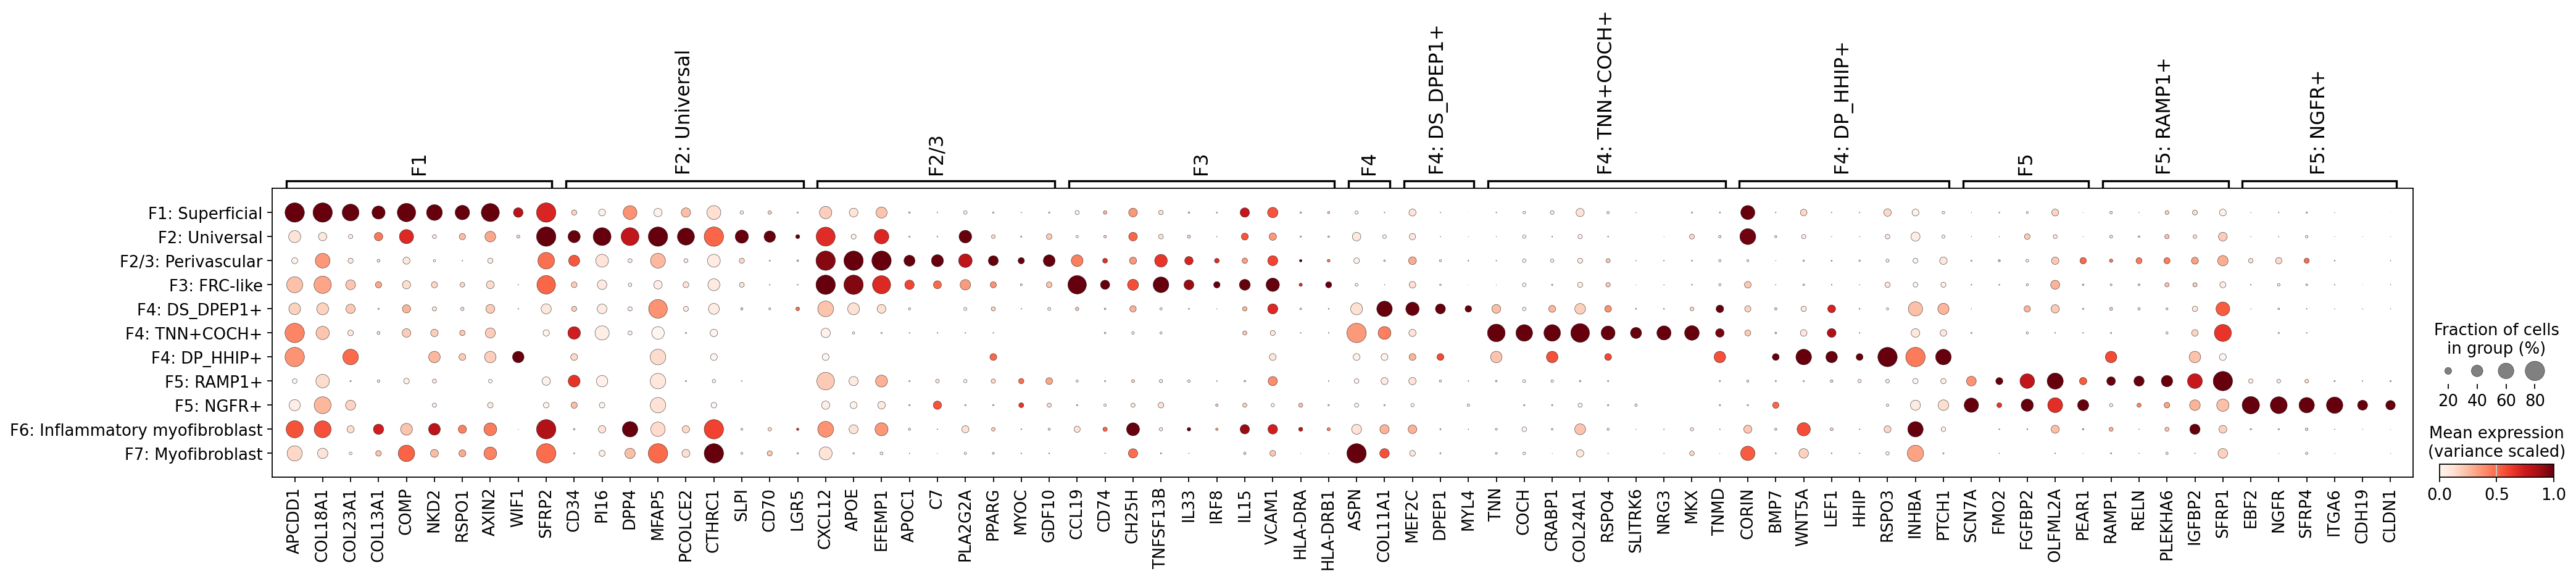

/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(

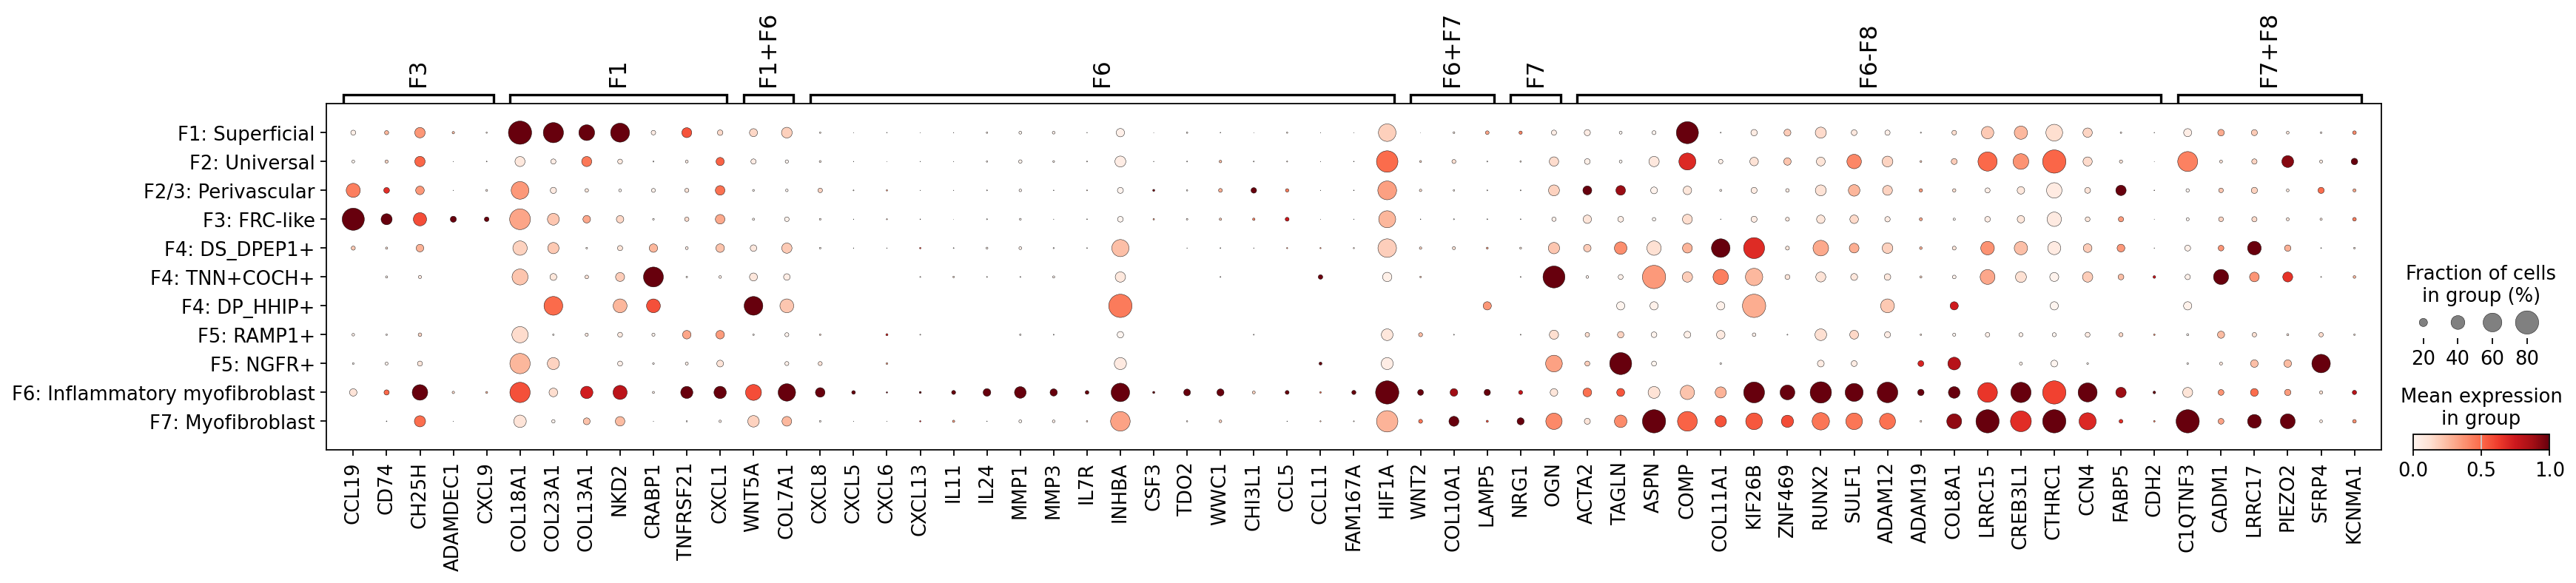

In [38]:
sc.pl.dotplot(
    adata,
    reynolds_short_final,
    groupby="cell_type_pred",
    vmax=1.0, standard_scale="var",
    colorbar_title='Mean expression\n(variance scaled)', 
    dendrogram=False, dot_max=0.8,
    categories_order = NEW_ORDER
   # save="fig3c_overalldotplot.pdf"
    
) 


sc.pl.dotplot(
    adata,
    LESIONAL_GENES_VSHORT5,
    groupby="cell_type_pred", 
        vmax=1.0, standard_scale="var",

   # vmax=1.1,
    #colorbar_title='Mean expression\n(log1p norm)', 
    dendrogram=False,
        categories_order = NEW_ORDER,
    dot_max=0.8,

) 
 